In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from matplotlib.pyplot import figure

In [3]:
path = 'datasets/Dados meteorológicos diários - estação Embrapa Agrossilvipastoril.xlsx'
dados_diarios = pd.read_excel(path, skiprows=4)

months = ['', 'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
dados_diarios.iloc[:,1] = dados_diarios.iloc[:,1].apply(lambda x: months.index(x))

dados_diarios.iloc[:,1] = [dt.strptime(f'{row[0]}-{row[1]}-{row[2]}', '%Y-%m-%d').timetuple().tm_yday for _, row in dados_diarios.iterrows()]
dados_diarios = dados_diarios.drop(['Unnamed: 2'], axis=1)

for i, idx in enumerate(dados_diarios.columns):
    print(i, idx)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/Dados meteorológicos diários - estação Embrapa Agrossilvipastoril.xlsx'

In [97]:
anos = {}
for ano in dados_diarios.iloc[:,0].unique():
    idxs = dados_diarios.iloc[:, 0] == ano
    anos[ano] = dados_diarios[idxs]

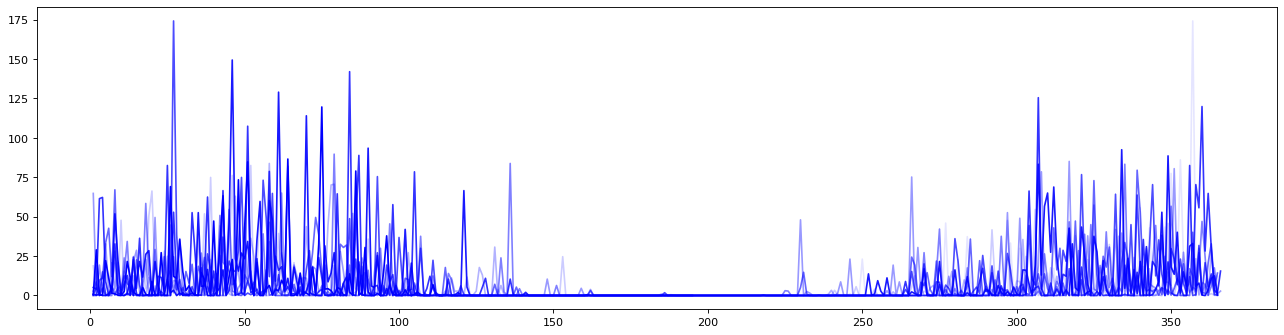

In [130]:
figure(figsize=(20, 5), dpi=80)
for ano, alpha in [ (a, (a-2013+1)/10) for a in dados_diarios.iloc[:,0].unique()]:
    plt.plot(anos[ano].iloc[:,1], anos[ano].iloc[:, 14], 'b', alpha=alpha)

In [77]:
import locale
locale.getlocale()

('pt_BR', 'UTF-8')